### EDA - analysera ansökningsomgång för kurser


In [4]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt

df = pd.read_excel(
    "data/resultat-ansokningsomgang-2024.xlsx", sheet_name="Tabell 3", skiprows=5
)
df.head()

,Utbildningsområde,SUN5 inriktning,SUN5 inriktning namn,Utbildningsnamn,Beslut,Diarienummer,Flera kommuner,Antal kommuner,Län,Kommun,...,Sökta utbildningsomgångar,Beviljade utbildningsomgångar,Sökta platser per utbildningsomgång,Sökta platser totalt,Beviljade platser utbildningsomgång 1,Beviljade platser utbildningsomgång 2,Beviljade platser utbildningsomgång 3,Beviljade platser utbildningsomgång 4,Beviljade platser utbildningsomgång 5,Beviljade platser totalt
0,Data/IT,481ab,"Utbildningar till programmerare, spel",AI Programmer,Avslag,MYH 2024/3742,Nej,1,Västerbotten,Umeå,...,3,0,30,90,0,0,0,0,0,0
1,Data/IT,481ab,"Utbildningar till programmerare, spel","Forsbergs, Spelutvecklare – Game Programming",Avslag,MYH 2024/4174,Nej,1,Stockholm,Stockholm,...,3,0,20,60,0,0,0,0,0,0
2,Data/IT,481ab,"Utbildningar till programmerare, spel",Futuregames Game Programmer Specialization,Avslag,MYH 2024/3029,Ja,2,Flera kommuner,Flera kommuner,...,3,0,30,90,0,0,0,0,0,0
3,Data/IT,481ab,"Utbildningar till programmerare, spel",Game Programmer,Avslag,MYH 2024/3425,Nej,1,Blekinge,Karlshamn,...,3,0,25,75,0,0,0,0,0,0
4,Data/IT,481ab,"Utbildningar till programmerare, spel",Spelprogrammerare,Beviljad,MYH 2024/3852,Nej,1,Skåne,Malmö,...,4,3,35,140,35,35,35,0,0,105


In [9]:
df.value_counts()

Utbildningsområde  SUN5 inriktning  SUN5 inriktning namn                                 Utbildningsnamn                                 Beslut    Diarienummer   Flera kommuner  Antal kommuner  Län              Kommun          YH-poäng  Studieform  Studietakt %  Typ av examen        SeQF nivå  Smalt yrkesområde  Utbildningsanordnare administrativ enhet    Huvudmannatyp  Sökta utbildningsomgångar  Beviljade utbildningsomgångar  Sökta platser per utbildningsomgång  Sökta platser totalt  Beviljade platser utbildningsomgång 1  Beviljade platser utbildningsomgång 2  Beviljade platser utbildningsomgång 3  Beviljade platser utbildningsomgång 4  Beviljade platser utbildningsomgång 5  Beviljade platser totalt
Övrigt             999za            Traditionella hantverksyrken, lärling                Lärlingsutbildning inom traditionellt hantverk  Beviljad  MYH 2024/3026  Nej             1               Stockholm        Stockholm       400       Bunden      100           Yrkeshögskoleexamen  5.0   

In [13]:
df.describe()

,Antal kommuner,YH-poäng,Studietakt %,SeQF nivå,Sökta utbildningsomgångar,Beviljade utbildningsomgångar,Sökta platser per utbildningsomgång,Sökta platser totalt,Beviljade platser utbildningsomgång 1,Beviljade platser utbildningsomgång 2,Beviljade platser utbildningsomgång 3,Beviljade platser utbildningsomgång 4,Beviljade platser utbildningsomgång 5,Beviljade platser totalt
count,1272.000000,1272.000000,1272.000000,1252.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,1.432390,362.837264,96.206761,5.017572,3.581761,0.801101,29.937107,106.927673,7.780660,7.744497,7.357704,0.128145,0.069182,23.080189
std,0.979806,89.905455,12.848528,0.131442,0.917312,1.328937,6.374305,34.995530,13.276512,13.263414,13.071800,1.899545,1.475718,39.772265
min,1.000000,100.000000,50.000000,5.000000,1.000000,0.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,300.000000,100.000000,5.000000,3.000000,0.000000,25.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,400.000000,100.000000,5.000000,3.000000,0.000000,32.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,400.000000,100.000000,5.000000,4.000000,3.000000,35.000000,135.000000,20.000000,20.000000,12.000000,0.000000,0.000000,48.000000
max,9.000000,999.000000,100.000000,6.000000,5.000000,5.000000,35.000000,175.000000,35.000000,35.000000,35.000000,35.000000,35.000000,175.000000


In [61]:
df["Sökta utbildningsomgångar"].unique()

array([3, 4, 5, 2, 1])

In [14]:
# Visa kolumnnamn och datatyper
print(df.columns)
print(df.info())


Index(['Utbildningsområde', 'SUN5 inriktning', 'SUN5 inriktning namn',
       'Utbildningsnamn', 'Beslut', 'Diarienummer', 'Flera kommuner',
       'Antal kommuner', 'Län', 'Kommun', 'YH-poäng', 'Studieform',
       'Studietakt %', 'Typ av examen', 'SeQF nivå', 'Smalt yrkesområde',
       'Utbildningsanordnare administrativ enhet', 'Huvudmannatyp',
       'Sökta utbildningsomgångar', 'Beviljade utbildningsomgångar',
       'Sökta platser per utbildningsomgång', 'Sökta platser totalt',
       'Beviljade platser utbildningsomgång 1',
       'Beviljade platser utbildningsomgång 2',
       'Beviljade platser utbildningsomgång 3',
       'Beviljade platser utbildningsomgång 4',
       'Beviljade platser utbildningsomgång 5', 'Beviljade platser totalt'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                              

In [21]:
# Visa exempel på utbildningsnamn
print(df["Utbildningsnamn"].unique())


['AI Programmer' 'Forsbergs, Spelutvecklare – Game Programming'
 'Futuregames Game Programmer Specialization' 'Game Programmer'
 'Spelprogrammerare' '.NET Developer' '.NET Utvecklare'
 '.NET-Cloud developer' '.NET-utvecklare'
 '.NET-utvecklare med molninriktning' 'AI Developer' 'AI developer'
 'Backend Developer inriktning Cloud'
 'Backend- och Cloudutvecklare med AI-kompetens' 'Cloud Developer'
 'DevSecOps Engineer' 'Fullstack developer' 'Fullstackutvecklare'
 'Fullstack-utvecklare' 'Fullstackutvecklare .NET'
 'Fullstackutvecklare AI' 'Fullstackutvecklare Java'
 'Integrationsutvecklare AI-motorer' 'Java Developer' 'Javautvecklare'
 'Javautvecklare med molninriktning' 'Mjukvaruutvecklare'
 'Mjukvaruutvecklare inriktning AI'
 'Mjukvaruutvecklare inriktning mobilitetstjänster'
 'Mjukvaruutvecklare med AI-inriktning'
 'Mjukvaruutvecklare med inriktning AI' 'MLOps Engineer'
 'Molnutvecklare Node.js' 'Python-Engineer'
 'Pythonutvecklare - generativ AI' 'Pythonutvecklare inom AI'
 'Pythonutv

In [22]:
# Unika värden för "Typ av examen"
print(df["Typ av examen"].unique())


['Yrkeshögskoleexamen' 'KvalificeradYrkeshögskoleexamen' 'Ingen']


In [23]:
# Unika värden för "YH-poäng"
print(df["YH-poäng"].unique())


[550 450 500 430 400 410 420 300 415 220 425 320 200 435 465 280 440 375
 380 405 225 315 325 230 100 210 335 310 385 150 215 235 260 600 250 545
 350 290 390 360 365 195 240 110 255 999 340 125 120 295 205 130 330 355]


In [26]:
# Justerad filtrering för kurser
courses_df = df[(df["Typ av examen"] == "Ingen") & (df["YH-poäng"] <= 200)]

# Bekräfta filtreringen
print(courses_df.head())
print(f"Antal kurser identifierade: {len(courses_df)}")


                           Utbildningsområde SUN5 inriktning  \
463  Ekonomi, administration och försäljning           345ac   
550                 Friskvård och kroppsvård           813zy   
571            Hotell, restaurang och turism           811cd   
572            Hotell, restaurang och turism           811cd   
597  Hälso- och sjukvård samt socialt arbete           723py   

                         SUN5 inriktning namn  \
463          Ledarskapsutbildningar inom vård   
550  Övriga utbildningar idrott och friskvård   
571  Utbildningar till kökschef (köksmästare)   
572  Utbildningar till kökschef (köksmästare)   
597  Övriga utbildningar, inriktning sjukvård   

                                       Utbildningsnamn  Beslut   Diarienummer  \
463  Operativ digitaliseringskoordinator för hälso-...  Avslag  MYH 2024/3284   
550    Yogalärare med specialkompetens inom yogaterapi  Avslag  MYH 2024/3172   
571                  Hållbar Administrativ Köksmästare  Avslag  MYH 2024/4105

In [ ]:
# identifiera kurserna
courses_omgangar_df = courses_df[[
    "Utbildningsnamn", 
    "Sökta utbildningsomgångar", 
    "Beviljade utbildningsomgångar", 
    "Sökta platser totalt", 
    "Beviljade platser totalt"
]]

# Visa de första raderna för att verifiera data
print(courses_omgangar_df.head())

# Sammanfattande statistik för dessa kurser
print("\nSammanfattande statistik för ansökningsomgångar:")
print(courses_omgangar_df.describe())


                                       Utbildningsnamn  \
463  Operativ digitaliseringskoordinator för hälso-...   
550    Yogalärare med specialkompetens inom yogaterapi   
571                  Hållbar Administrativ Köksmästare   
572                  Hållbar Administrativ Köksmästare   
597                  HSL-kompetens för undersköterskor   

     Sökta utbildningsomgångar  Beviljade utbildningsomgångar  \
463                          5                              0   
550                          2                              0   
571                          5                              0   
572                          3                              0   
597                          2                              0   

     Sökta platser totalt  Beviljade platser totalt  
463                   150                         0  
550                    60                         0  
571                   175                         0  
572                    60                   

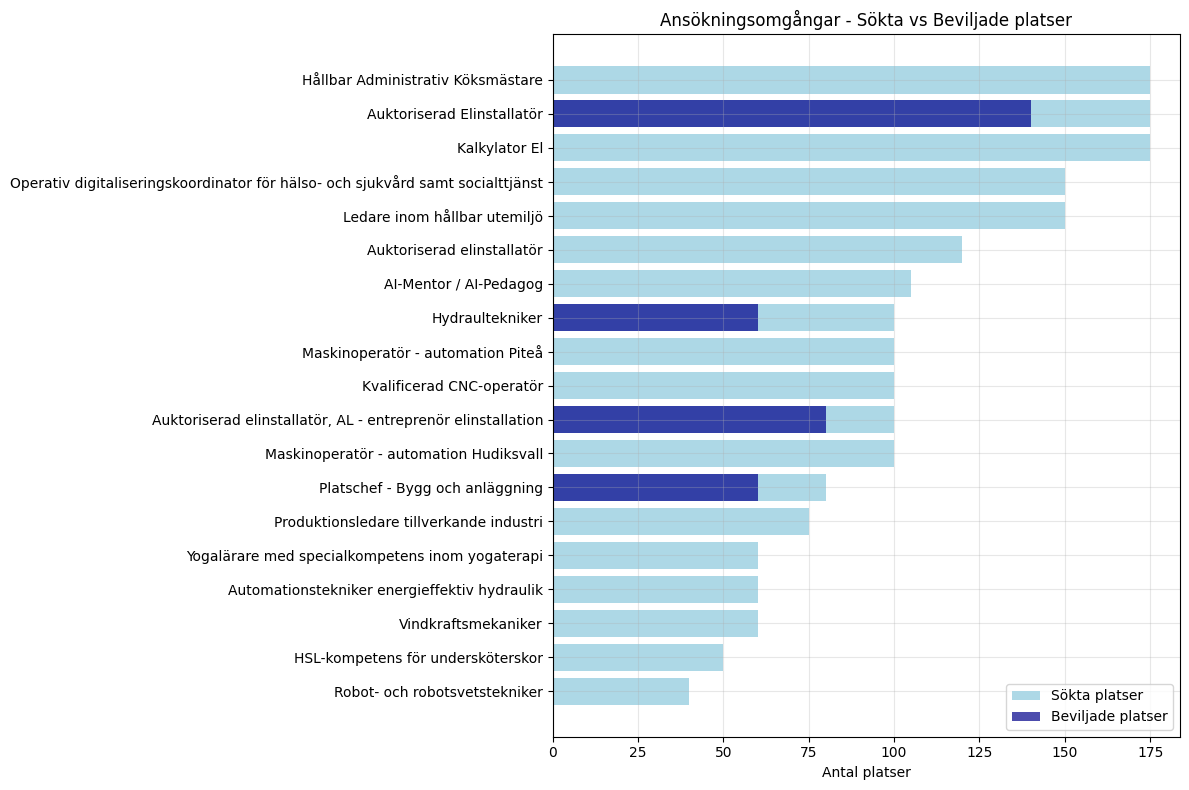

In [29]:
# Sortera efter antalet sökta platser totalt
sorted_courses = courses_omgangar_df.sort_values(by="Sökta platser totalt", ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(sorted_courses["Utbildningsnamn"], sorted_courses["Sökta platser totalt"], color='lightblue', label='Sökta platser')
plt.barh(sorted_courses["Utbildningsnamn"], sorted_courses["Beviljade platser totalt"], color='darkblue', alpha=0.7, label='Beviljade platser')

plt.xlabel("Antal platser")
plt.title("Ansökningsomgångar - Sökta vs Beviljade platser")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


In [46]:
# Undvik division med noll
courses_omgangar_df["Andel beviljade platser (%)"] = (
    courses_omgangar_df["Beviljade platser totalt"] / courses_omgangar_df["Sökta platser totalt"]
) * 100

# Fyll NaN med 0 (för kurser som inte har några sökta platser)
courses_omgangar_df["Andel beviljade platser (%)"].fillna(0, inplace=True)

# Visa resultaten sorterade efter andel beviljade platser
print(courses_omgangar_df.sort_values(by="Andel beviljade platser (%)", ascending=False))


                                        Utbildningsnamn  \
1111  Auktoriserad elinstallatör, AL - entreprenör e...   
1109                         Auktoriserad Elinstallatör   
903                     Platschef - Bygg och anläggning   
1194                                    Hydraultekniker   
572                   Hållbar Administrativ Köksmästare   
571                   Hållbar Administrativ Köksmästare   
550     Yogalärare med specialkompetens inom yogaterapi   
463   Operativ digitaliseringskoordinator för hälso-...   
840                              AI-Mentor / AI-Pedagog   
919                                       Kalkylator El   
825                        Ledare inom hållbar utemiljö   
597                   HSL-kompetens för undersköterskor   
1082            Produktionsledare tillverkande industri   
1053                          Kvalificerad CNC-operatör   
1163                                Vindkraftsmekaniker   
1110                         Auktoriserad elinstallatör 

C:\Users\milou\AppData\Local\Temp\ipykernel_21908\3824005417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses_omgangar_df["Andel beviljade platser (%)"] = (
C:\Users\milou\AppData\Local\Temp\ipykernel_21908\3824005417.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  courses

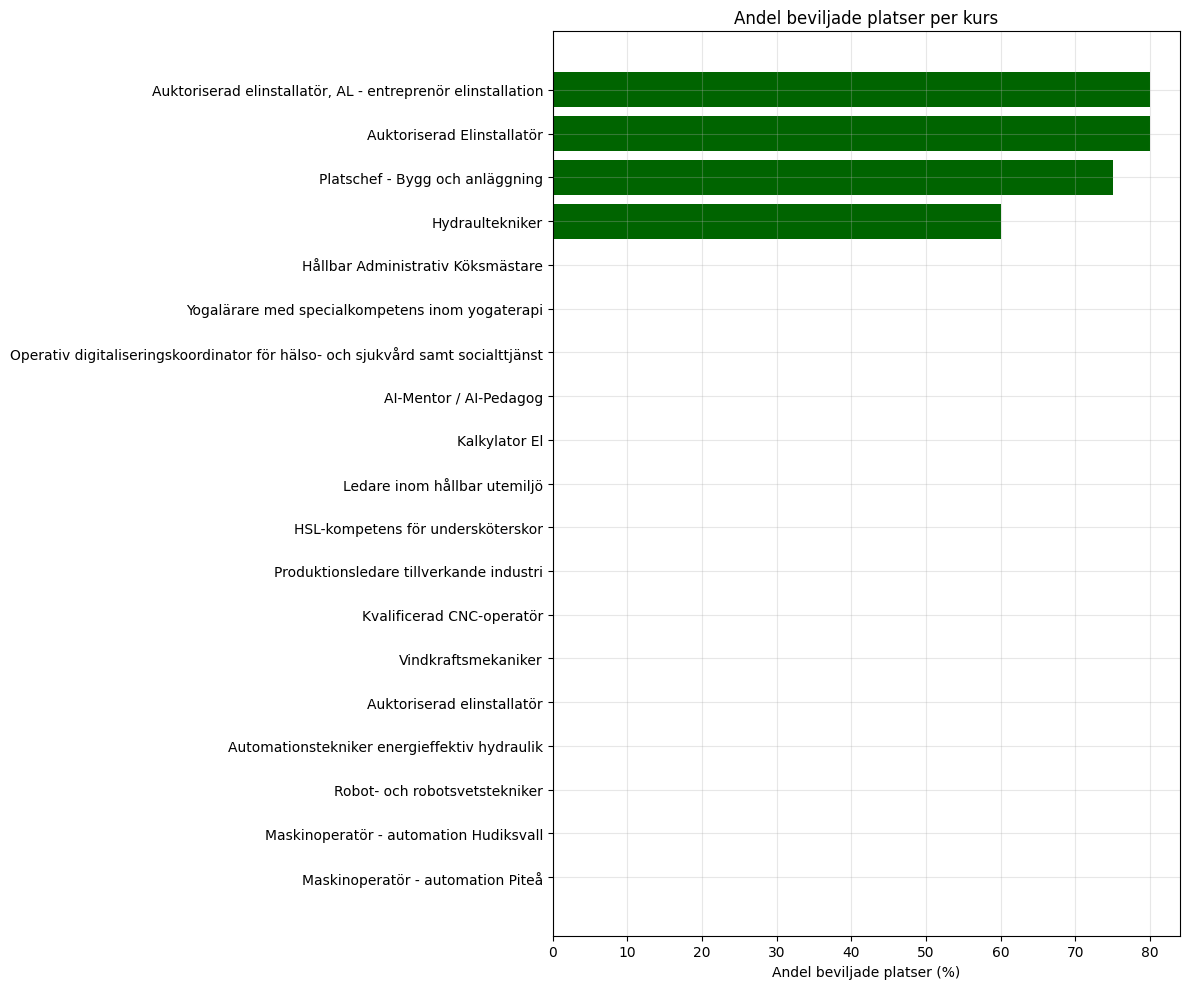

In [31]:
# Sortera kurserna efter andel beviljade platser i fallande ordning
sorted_courses_percentage = courses_omgangar_df.sort_values(by="Andel beviljade platser (%)", ascending=False)

# Plot
plt.figure(figsize=(12, 10))
plt.barh(sorted_courses_percentage["Utbildningsnamn"], sorted_courses_percentage["Andel beviljade platser (%)"], color='darkgreen')

plt.xlabel("Andel beviljade platser (%)")
plt.title("Andel beviljade platser per kurs")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


In [36]:
# Antag att hela datasetet med omgångar heter df (originaldf)

# Filtrera ansökningsomgångar endast för de kurser som finns i courses_df
# Vi använder "Utbildningsnamn" som kopplingsnyckel (om detta är unikt)

# Extrahera namn på kurser från courses_df
filtered_course_names = courses_df["Utbildningsnamn"].unique()

# Filtrera originaldf baserat på dessa kurser
filtered_omgangar_df = df[df["Utbildningsnamn"].isin(filtered_course_names)]

# Visa ett exempel på filtreringen
filtered_omgangar_df.head()


,Utbildningsområde,SUN5 inriktning,SUN5 inriktning namn,Utbildningsnamn,Beslut,Diarienummer,Flera kommuner,Antal kommuner,Län,Kommun,...,Sökta utbildningsomgångar,Beviljade utbildningsomgångar,Sökta platser per utbildningsomgång,Sökta platser totalt,Beviljade platser utbildningsomgång 1,Beviljade platser utbildningsomgång 2,Beviljade platser utbildningsomgång 3,Beviljade platser utbildningsomgång 4,Beviljade platser utbildningsomgång 5,Beviljade platser totalt
463,"Ekonomi, administration och försäljning",345ac,Ledarskapsutbildningar inom vård,Operativ digitaliseringskoordinator för hälso-...,Avslag,MYH 2024/3284,Nej,1,Värmland,Arvika,...,5,0,30,150,0,0,0,0,0,0
550,Friskvård och kroppsvård,813zy,Övriga utbildningar idrott och friskvård,Yogalärare med specialkompetens inom yogaterapi,Avslag,MYH 2024/3172,Nej,1,Stockholm,Stockholm,...,2,0,30,60,0,0,0,0,0,0
571,"Hotell, restaurang och turism",811cd,Utbildningar till kökschef (köksmästare),Hållbar Administrativ Köksmästare,Avslag,MYH 2024/4105,Nej,1,Stockholm,Stockholm,...,5,0,35,175,0,0,0,0,0,0
572,"Hotell, restaurang och turism",811cd,Utbildningar till kökschef (köksmästare),Hållbar Administrativ Köksmästare,Avslag,MYH 2024/4114,Nej,1,Skåne,Malmö,...,3,0,20,60,0,0,0,0,0,0
597,Hälso- och sjukvård samt socialt arbete,723py,"Övriga utbildningar, inriktning sjukvård",HSL-kompetens för undersköterskor,Avslag,MYH 2024/3660,Nej,1,Skåne,Trelleborg,...,2,0,25,50,0,0,0,0,0,0


In [37]:
# Sammanställ antal sökta och beviljade omgångar för filtrerade kurser

# Summera över hela filtrerade datamängden
total_sokta_omgangar = filtered_omgangar_df["Sökta utbildningsomgångar"].sum()
total_beviljade_omgangar = filtered_omgangar_df["Beviljade utbildningsomgångar"].sum()

print(f"Totalt sökta utbildningsomgångar: {total_sokta_omgangar}")
print(f"Totalt beviljade utbildningsomgångar: {total_beviljade_omgangar}")


Totalt sökta utbildningsomgångar: 79
Totalt beviljade utbildningsomgångar: 14


In [38]:
# Summera beviljade platser i de olika omgångarna

platser_omgang_1 = filtered_omgangar_df["Beviljade platser utbildningsomgång 1"].sum()
platser_omgang_2 = filtered_omgangar_df["Beviljade platser utbildningsomgång 2"].sum()
platser_omgang_3 = filtered_omgangar_df["Beviljade platser utbildningsomgång 3"].sum()
platser_omgang_4 = filtered_omgangar_df["Beviljade platser utbildningsomgång 4"].sum()
platser_omgang_5 = filtered_omgangar_df["Beviljade platser utbildningsomgång 5"].sum()

print(f"Beviljade platser omgång 1: {platser_omgang_1}")
print(f"Beviljade platser omgång 2: {platser_omgang_2}")
print(f"Beviljade platser omgång 3: {platser_omgang_3}")
print(f"Beviljade platser omgång 4: {platser_omgang_4}")
print(f"Beviljade platser omgång 5: {platser_omgang_5}")


Beviljade platser omgång 1: 95
Beviljade platser omgång 2: 95
Beviljade platser omgång 3: 95
Beviljade platser omgång 4: 55
Beviljade platser omgång 5: 0


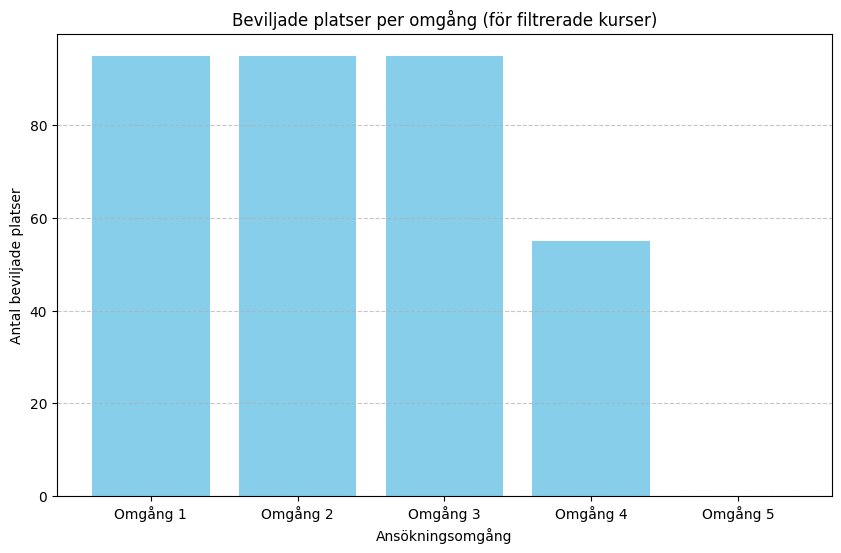

In [39]:
import matplotlib.pyplot as plt

labels = ["Omgång 1", "Omgång 2", "Omgång 3", "Omgång 4", "Omgång 5"]
platser = [
    platser_omgang_1,
    platser_omgang_2,
    platser_omgang_3,
    platser_omgang_4,
    platser_omgang_5
]

plt.figure(figsize=(10, 6))
plt.bar(labels, platser, color='skyblue')
plt.title("Beviljade platser per omgång (för filtrerade kurser)")
plt.xlabel("Ansökningsomgång")
plt.ylabel("Antal beviljade platser")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [47]:
courses_df = df[(df["Typ av examen"] == "Ingen") & (df["YH-poäng"] <= 200)].copy()

print(f"Antal kurser identifierade: {len(courses_df)}")
courses_df.head()


Antal kurser identifierade: 20


,Utbildningsområde,SUN5 inriktning,SUN5 inriktning namn,Utbildningsnamn,Beslut,Diarienummer,Flera kommuner,Antal kommuner,Län,Kommun,...,Sökta utbildningsomgångar,Beviljade utbildningsomgångar,Sökta platser per utbildningsomgång,Sökta platser totalt,Beviljade platser utbildningsomgång 1,Beviljade platser utbildningsomgång 2,Beviljade platser utbildningsomgång 3,Beviljade platser utbildningsomgång 4,Beviljade platser utbildningsomgång 5,Beviljade platser totalt
463,"Ekonomi, administration och försäljning",345ac,Ledarskapsutbildningar inom vård,Operativ digitaliseringskoordinator för hälso-...,Avslag,MYH 2024/3284,Nej,1,Värmland,Arvika,...,5,0,30,150,0,0,0,0,0,0
550,Friskvård och kroppsvård,813zy,Övriga utbildningar idrott och friskvård,Yogalärare med specialkompetens inom yogaterapi,Avslag,MYH 2024/3172,Nej,1,Stockholm,Stockholm,...,2,0,30,60,0,0,0,0,0,0
571,"Hotell, restaurang och turism",811cd,Utbildningar till kökschef (köksmästare),Hållbar Administrativ Köksmästare,Avslag,MYH 2024/4105,Nej,1,Stockholm,Stockholm,...,5,0,35,175,0,0,0,0,0,0
572,"Hotell, restaurang och turism",811cd,Utbildningar till kökschef (köksmästare),Hållbar Administrativ Köksmästare,Avslag,MYH 2024/4114,Nej,1,Skåne,Malmö,...,3,0,20,60,0,0,0,0,0,0
597,Hälso- och sjukvård samt socialt arbete,723py,"Övriga utbildningar, inriktning sjukvård",HSL-kompetens för undersköterskor,Avslag,MYH 2024/3660,Nej,1,Skåne,Trelleborg,...,2,0,25,50,0,0,0,0,0,0


In [49]:
# Fördelning av beslut för kurser (Typ av examen == Ingen)
print("Kurser:")
print(df[df["Typ av examen"] == "Ingen"]["Beslut"].value_counts())

# Fördelning av beslut för program (andra än Ingen)
print("\nProgram:")
print(df[df["Typ av examen"] != "Ingen"]["Beslut"].value_counts())


Kurser:
Beslut
Avslag      16
Beviljad     4
Name: count, dtype: int64

Program:
Beslut
Avslag      912
Beviljad    340
Name: count, dtype: int64


In [50]:
# Summera beviljade platser för kurser
beviljade_kurser = df[df["Typ av examen"] == "Ingen"][[
    "Beviljade platser utbildningsomgång 1",
    "Beviljade platser utbildningsomgång 2",
    "Beviljade platser utbildningsomgång 3",
    "Beviljade platser utbildningsomgång 4",
    "Beviljade platser utbildningsomgång 5"
]].sum()

print("Beviljade platser kurser per omgång:")
print(beviljade_kurser)

# Summera beviljade platser för program
beviljade_program = df[df["Typ av examen"] != "Ingen"][[
    "Beviljade platser utbildningsomgång 1",
    "Beviljade platser utbildningsomgång 2",
    "Beviljade platser utbildningsomgång 3",
    "Beviljade platser utbildningsomgång 4",
    "Beviljade platser utbildningsomgång 5"
]].sum()

print("\nBeviljade platser program per omgång:")
print(beviljade_program)


Beviljade platser kurser per omgång:
Beviljade platser utbildningsomgång 1    95
Beviljade platser utbildningsomgång 2    95
Beviljade platser utbildningsomgång 3    95
Beviljade platser utbildningsomgång 4    55
Beviljade platser utbildningsomgång 5     0
dtype: int64

Beviljade platser program per omgång:
Beviljade platser utbildningsomgång 1    9802
Beviljade platser utbildningsomgång 2    9756
Beviljade platser utbildningsomgång 3    9264
Beviljade platser utbildningsomgång 4     108
Beviljade platser utbildningsomgång 5      88
dtype: int64


### Antalet beviljade platser per kurs och ansökningsomgång

In [ ]:
# Cell 2: Visa per kurs (filtrerade kurser) hur många platser som blivit beviljade per omgång

courses_df = df[(df["Typ av examen"] == "Ingen") & (df["YH-poäng"] <= 200)].copy()

# Välj ut relevant info: utbildningsnamn + beviljade platser per omgång
beviljade_cols = [
    "Beviljade platser utbildningsomgång 1",
    "Beviljade platser utbildningsomgång 2",
    "Beviljade platser utbildningsomgång 3",
    "Beviljade platser utbildningsomgång 4",
    "Beviljade platser utbildningsomgång 5"
]

# Fyll eventuella NaN med 0 för säkerhet
courses_df[beviljade_cols] = courses_df[beviljade_cols].fillna(0)

# Filtrera ut endast de kurser som har minst en beviljad plats i någon omgång
courses_with_beviljade = courses_df[
    (courses_df[beviljade_cols].sum(axis=1) > 0)
].copy()

# Omvandla data från bred till lång form för bättre visning
courses_long = courses_with_beviljade.melt(
    id_vars=["Utbildningsnamn"],
    value_vars=beviljade_cols,
    var_name="Omgång",
    value_name="Beviljade platser"
)

# Rensa omgångsnamnet för tydlighet, t.ex. "Beviljade platser utbildningsomgång 1" -> "1"
courses_long["Omgång"] = courses_long["Omgång"].str.extract(r'(\d)')

# Visa alla kurser med beviljade platser per omgång (sorterat efter antal platser)
display(courses_long[courses_long["Beviljade platser"] > 0].sort_values(
    by=["Beviljade platser", "Utbildningsnamn"], ascending=[False, True]
))


,Utbildningsnamn,Omgång,Beviljade platser
1,Auktoriserad Elinstallatör,1,35
5,Auktoriserad Elinstallatör,2,35
9,Auktoriserad Elinstallatör,3,35
13,Auktoriserad Elinstallatör,4,35
2,"Auktoriserad elinstallatör, AL - entreprenör e...",1,20
6,"Auktoriserad elinstallatör, AL - entreprenör e...",2,20
10,"Auktoriserad elinstallatör, AL - entreprenör e...",3,20
14,"Auktoriserad elinstallatör, AL - entreprenör e...",4,20
3,Hydraultekniker,1,20
7,Hydraultekniker,2,20


### Antalet sökta utbildningsomgångar för olika kurser

In [60]:
# Filtrera kurser som tidigare
courses_df = df[(df["Typ av examen"] == "Ingen") & (df["YH-poäng"] <= 200)].copy()

# Exempel: anta att 'Sökta utbildningsomgångar' är en sträng med omgångar separerade med kommatecken, t.ex. "1,2,3"
# Om så, gör om till lista
courses_df["Sökta utbildningsomgångar"] = courses_df["Sökta utbildningsomgångar"].fillna("").astype(str)

# Skapa en rad per omgång och kurs
rows = []
for idx, row in courses_df.iterrows():
    omgångar = row["Sökta utbildningsomgångar"].split(",")  # dela på kommatecken
    omgångar = [omg.strip() for omg in omgångar if omg.strip().isdigit()]  # rensa och filtrera bara siffror
    if len(omgångar) == 0:
        continue
    # Fördela sökta platser jämt över omgångarna (om vi inte vet exakt fördelning)
    sökta_per_omgång = row["Sökta platser totalt"] / len(omgångar)
    for omg in omgångar:
        rows.append({
            "Utbildningsnamn": row["Utbildningsnamn"],
            "Omgång": int(omg),
            "Sökta platser": sökta_per_omgång
        })

# Skapa ny DataFrame med sökta platser per kurs och omgång
sokta_per_omgang_df = pd.DataFrame(rows)

# Visa resultatet sorterat
print(sokta_per_omgang_df.sort_values(by=["Utbildningsnamn", "Omgång"]))


                                      Utbildningsnamn  Omgång  Sökta platser
6                              AI-Mentor / AI-Pedagog       3          105.0
11                         Auktoriserad Elinstallatör       5          175.0
12                         Auktoriserad elinstallatör       4          120.0
13  Auktoriserad elinstallatör, AL - entreprenör e...       5          100.0
15       Automationstekniker energieffektiv hydraulik       3           60.0
4                   HSL-kompetens för undersköterskor       2           50.0
16                                    Hydraultekniker       5          100.0
3                   Hållbar Administrativ Köksmästare       3           60.0
2                   Hållbar Administrativ Köksmästare       5          175.0
8                                       Kalkylator El       5          175.0
9                           Kvalificerad CNC-operatör       5          100.0
5                        Ledare inom hållbar utemiljö       5          150.0

In [63]:
import pandas as pd

# Anta att 'courses_long' är dataframe med beviljade platser per kurs och omgång (från tidigare)
# och 'sokta_per_omgang_df' är dataframe med sökta platser per kurs och omgång (från tidigare)

# Byt Omgång-kolumn till int om det behövs
courses_long["Omgång"] = courses_long["Omgång"].astype(int)
sokta_per_omgang_df["Omgång"] = sokta_per_omgang_df["Omgång"].astype(int)

# Slå ihop på 'Utbildningsnamn' och 'Omgång'
merged_df = pd.merge(
    sokta_per_omgang_df,
    courses_long,
    on=["Utbildningsnamn", "Omgång"],
    how="outer"  # outer så vi får med kurser som ev saknas i ena av datana
)

# Fyll NaN med 0 (för kurser som saknas i ena datan)
merged_df["Sökta platser"] = merged_df["Sökta platser"].fillna(0)
merged_df["Beviljade platser"] = merged_df["Beviljade platser"].fillna(0)

merged_df.head()


,Utbildningsnamn,Omgång,Sökta platser,Beviljade platser
0,AI-Mentor / AI-Pedagog,3,105.0,0.0
1,Auktoriserad Elinstallatör,1,0.0,35.0
2,Auktoriserad Elinstallatör,2,0.0,35.0
3,Auktoriserad Elinstallatör,3,0.0,35.0
4,Auktoriserad Elinstallatör,4,0.0,35.0


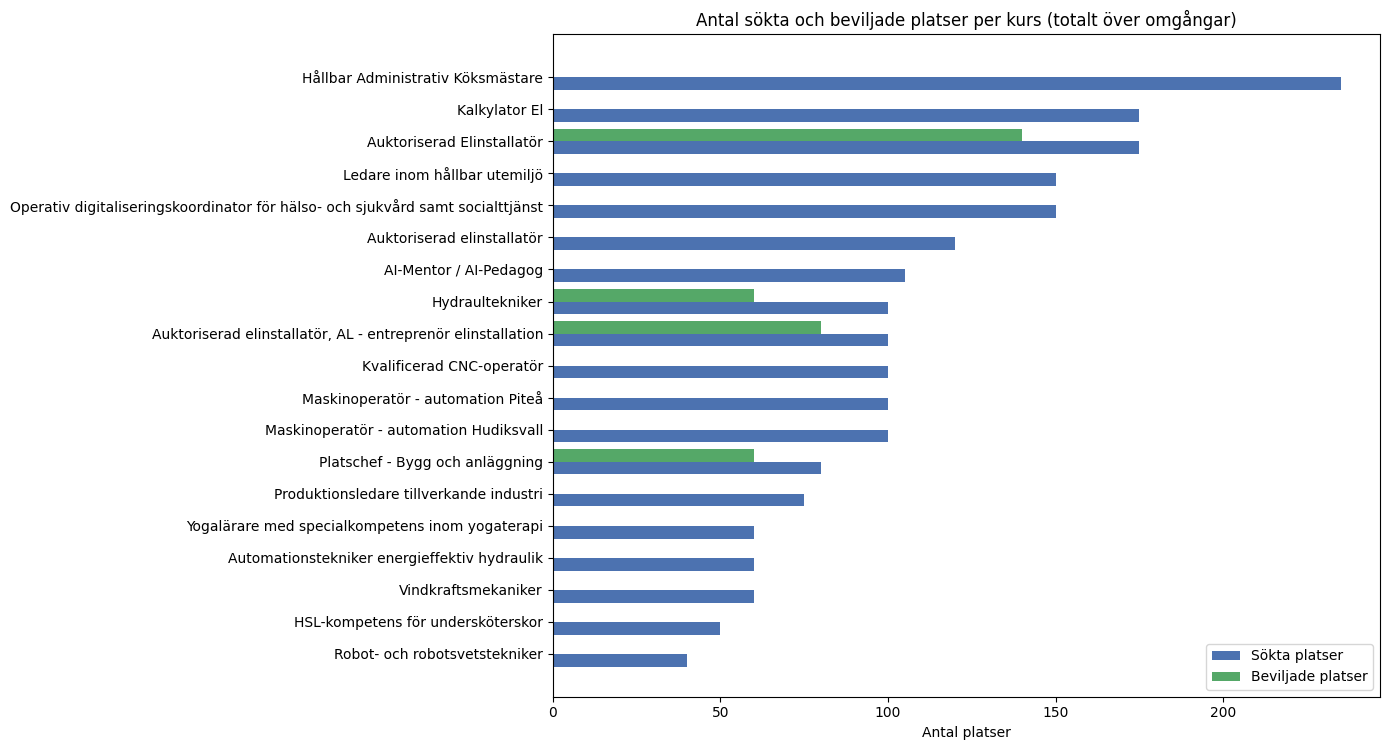

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Steg 1: Summera antal per kurs (alla omgångar)
beviljade_sum = courses_long.groupby("Utbildningsnamn")["Beviljade platser"].sum().reset_index()
beviljade_sum.rename(columns={"Beviljade platser": "Beviljade platser totalt"}, inplace=True)

sokta_sum = sokta_per_omgang_df.groupby("Utbildningsnamn")["Sökta platser"].sum().reset_index()
sokta_sum.rename(columns={"Sökta platser": "Sökta platser totalt"}, inplace=True)

# Steg 2: Slå ihop båda summeringarna
merged_totals = pd.merge(sokta_sum, beviljade_sum, on="Utbildningsnamn", how="outer").fillna(0)

# Steg 3: Sortera efter sökta platser (från lägst till högst för bättre visuellt flöde)
merged_totals = merged_totals.sort_values(by="Sökta platser totalt", ascending=True).reset_index(drop=True)

# Steg 4: Plot horisontell stapelgraf
plt.figure(figsize=(14, len(merged_totals)*0.4))

bar_height = 0.4
indices = range(len(merged_totals))

plt.barh(indices, merged_totals["Sökta platser totalt"], height=bar_height, color="#4c72b0", label="Sökta platser")
plt.barh([i + bar_height for i in indices], merged_totals["Beviljade platser totalt"], height=bar_height, color="#55a868", label="Beviljade platser")

plt.yticks([i + bar_height / 2 for i in indices], merged_totals["Utbildningsnamn"])
plt.xlabel("Antal platser")
plt.title("Antal sökta och beviljade platser per kurs (totalt över omgångar)")

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


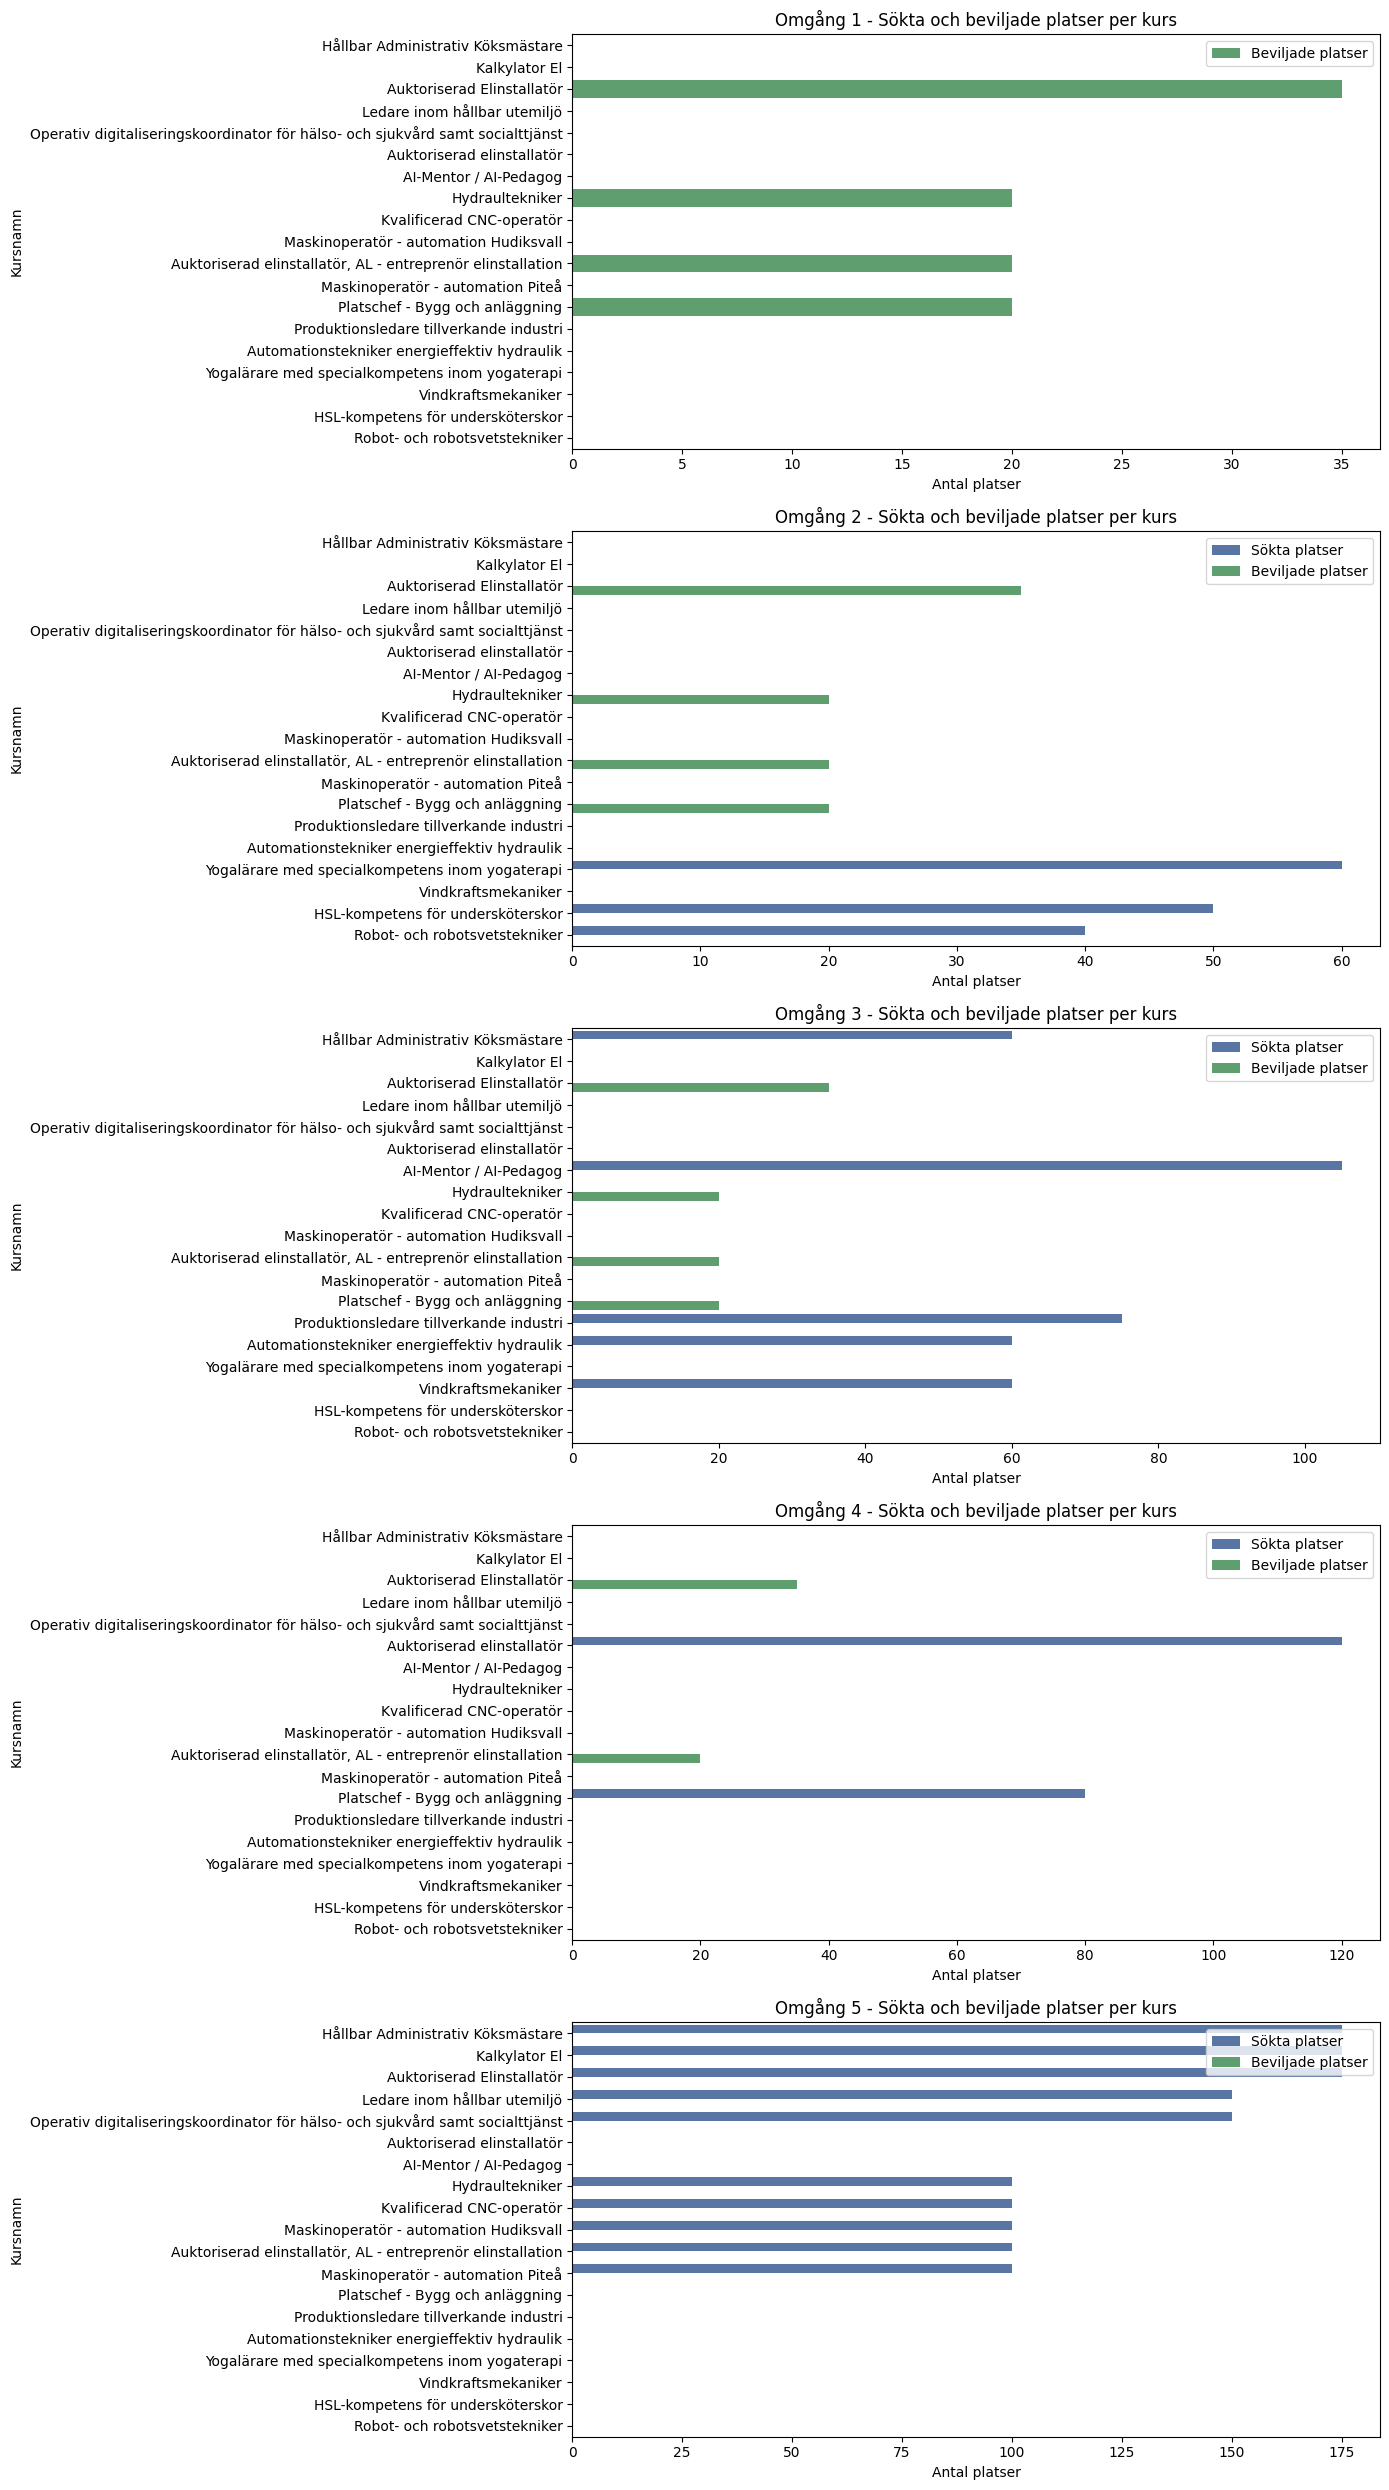

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

combined_df["Omgång"] = combined_df["Omgång"].astype(int)

fig, axes = plt.subplots(5, 1, figsize=(14, 25), sharex=False)

for i, ax in enumerate(axes, start=1):
    # Filtrera data för aktuell omgång och gör kopia för säker ändring
    df_omg = combined_df[combined_df["Omgång"] == i].copy()
    
    # Sortera kurser efter sökta platser för denna omgång (endast "Sökta platser")
    kurs_ordning = df_omg[df_omg["Typ"] == "Sökta platser"].sort_values(by="Antal platser", ascending=True)["Utbildningsnamn"]
    kurs_ordning = kurs_ordning.drop_duplicates()
    
    # Sätt kategorisk ordning (stigande, för horisontell plot)
    df_omg["Utbildningsnamn"] = pd.Categorical(df_omg["Utbildningsnamn"], categories=kurs_ordning, ordered=True)
    
    sns.barplot(data=df_omg, y="Utbildningsnamn", x="Antal platser", hue="Typ",
                palette={"Sökta platser": "#4c72b0", "Beviljade platser": "#55a868"}, ax=ax)
    
    ax.set_title(f"Omgång {i} - Sökta och beviljade platser per kurs")
    ax.set_ylabel("Kursnamn")
    ax.set_xlabel("Antal platser")
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


# EDA på resultat - för - kurser - sidan

In [2]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL till sidan med Excel-filerna
url = "https://www.myh.se/yrkeshogskolan/resultat-ansokningsomgangar/resultat-for-kurser"

# Mapp för att spara nedladdade filer
folder_path = "./kursdata"
os.makedirs(folder_path, exist_ok=True)

# Hämta HTML från sidan
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Hitta alla länkar till Excel-filer
excel_links = []
for link in soup.find_all("a", href=True):
    href = link["href"]
    if href.endswith(".xlsx"):
        excel_links.append(href)

# Om inga Excel-länkar hittades
if not excel_links:
    print("Inga Excel-länkar hittades på sidan.")
else:
    print(f"Antal Excel-filer hittade: {len(excel_links)}")

# Ladda ner filerna
for link in excel_links:
    filename = os.path.join(folder_path, os.path.basename(link))
    
    # Undvik att ladda ner filen om den redan finns
    if not os.path.exists(filename):
        try:
            print(f"Laddar ner: {link}")
            file_content = requests.get(link).content
            with open(filename, "wb") as file:
                file.write(file_content)
        except Exception as e:
            print(f"Fel vid nedladdning av {link}: {e}")

# Läs in all data
all_data = []

# Loopa igenom filerna och läs in dem
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        try:
            # Läs in alla sheets
            xls = pd.ExcelFile(file_path)
            for sheet_name in xls.sheet_names:
                df = pd.read_excel(xls, sheet_name=sheet_name)
                df["Källa"] = file  # Lägg till en kolumn som anger filen
                df["Sheet"] = sheet_name  # Lägg till en kolumn som anger sheet
                all_data.append(df)
        except Exception as e:
            print(f"Fel vid inläsning av {file}: {e}")

# Slå ihop alla DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    print(f"Totalt antal rader i sammanslagen DataFrame: {len(combined_df)}")
    print(combined_df.head())

    # Spara till CSV för vidare analys
    combined_df.to_csv("sammanstalld_kursdata.csv", index=False, encoding="utf-8-sig")
else:
    print("Ingen data lästes in.")


Antal Excel-filer hittade: 11
Laddar ner: https://assets.myh.se/docs/utbildningsformer/yrkeshogskolan/ansokningsomgangar/kurser-yh-2025/inkomna-ansokningar-2025-for-kurser.xlsx
Laddar ner: https://assets.myh.se/docs/utbildningsformer/yrkeshogskolan/ansokningsomgangar/kurser-yh-2024/resultat-2024-for-kurser-inom-yh.xlsx
Laddar ner: https://assets.myh.se/docs/utbildningsformer/yrkeshogskolan/ansokningsomgangar/kurser-yh-2024/inkomna-ansokningar-2024-for-kurser.xlsx
Laddar ner: https://assets.myh.se/docs/utbildningsformer/yrkeshogskolan/ansokningsomgangar/kurser-yh-2023/resultat-2023-for-kurser-inom-yh.xlsx
Laddar ner: https://assets.myh.se/docs/utbildningsformer/yrkeshogskolan/ansokningsomgangar/kurser-yh-2023/beviljade-kurser-inom-yrkeshogskolan-med-utokat-yh-anslag-2023.xlsx
Laddar ner: https://assets.myh.se/docs/utbildningsformer/yrkeshogskolan/ansokningsomgangar/kurser-yh-2023/inkomna-ansokningar-2023-for-kurser.xlsx
Laddar ner: https://assets.myh.se/docs/utbildningsformer/yrkeshogsk

In [5]:
import pandas as pd

# Läs in datan
file_path = "../src/data/sammanstalld_kursdata.csv"
df = pd.read_csv(file_path)



In [6]:
df.head()

,Utbildningsområde,Utbildningsnamn,YH-poäng,Anordnare,Kommun 1,Kommun 2,Kommun 3,Kommun 4,Kommun 5,Kommun 6,...,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025,Sökt antal platser 2026,Sökt antal platser 2021,Sökt antal platser 2022,Antal beviljade platser 2022,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025,Antal beviljade platser 2021
0,Data/IT,Agil testautomatiserare,60.0,IT-Högskolan Sverige AB,Göteborg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data/IT,Agila arbetsmetoder &DevOps för utveklare,40.0,Lernia Utbildning AB,Malmö,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data/IT,Agile Project Leader,60.0,Changemaker Educations AB,Stockholm,Boden,Skellefteå,Karlstad,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data/IT,Agilt ledarskap,20.0,Nackademin AB,Solna,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data/IT,Amazon AWS,60.0,Campus Mölndal,Mölndal,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9737 entries, 0 to 9736
Data columns (total 46 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Utbildningsområde                                3318 non-null   object 
 1   Utbildningsnamn                                  9507 non-null   object 
 2   YH-poäng                                         5746 non-null   float64
 3   Anordnare                                        208 non-null    object 
 4   Kommun 1                                         208 non-null    object 
 5   Kommun 2                                         134 non-null    object 
 6   Kommun 3                                         118 non-null    object 
 7   Kommun 4                                         110 non-null    object 
 8   Kommun 5                                         109 non-null    object 
 9   Kommun 6                      

In [8]:
# Visa alla kolumnnamn
print(df.columns)

# Hur många unika filer och sheets finns det?
print("Antal unika filer:", df["Källa"].nunique())
print("Antal unika sheets:", df["Sheet"].nunique())

# Visa de unika filerna
print("Unika filer:\n", df["Källa"].unique())

# Visa de unika sheets
print("Unika sheets:\n", df["Sheet"].unique())


Index(['Utbildningsområde', 'Utbildningsnamn', 'YH-poäng', 'Anordnare',
       'Kommun 1', 'Kommun 2', 'Kommun 3', 'Kommun 4', 'Kommun 5', 'Kommun 6',
       'Platser med start 2020', 'Platser med start 2021', 'Utbildningsnummer',
       'Källa', 'Sheet', 'Definitioner och förklaringar', 'Kommun 7',
       'Kommun 8', 'Kommun 9', 'Kommun 10',
       'Platser med start och avslut 2020', 'Diarienummer', 'Beslut',
       'Anordnare namn', 'Antal beviljade platser 2023',
       'Antal beviljade platser 2024', 'Totalt antal beviljade platser',
       'Kommun', 'Län', 'FA-region', 'Antal kommuner', 'Antal län',
       'Antal FA-regioner', 'Sökt utbildningsområde',
       'Sökt antal platser 2023', 'Sökt antal platser 2024',
       'Sökt antal platser 2024 (start och avslut 2024)',
       'Sökt antal platser 2025', 'Sökt antal platser 2026',
       'Sökt antal  platser 2021', 'Sökt antal platser 2022',
       'Antal beviljade platser 2022', 'Antal beviljade platser start 2024',
       'Antal 

In [9]:
# Ta bort tomma rader och kolumner
df.dropna(how="all", inplace=True, axis=0)  # Ta bort tomma rader
df.dropna(how="all", inplace=True, axis=1)  # Ta bort tomma kolumner

# Standardisera kolumnnamn (små bokstäver och understräck istället för mellanslag)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Visa nya kolumnnamn
print(df.columns)


Index(['utbildningsområde', 'utbildningsnamn', 'yh-poäng', 'anordnare',
       'kommun_1', 'kommun_2', 'kommun_3', 'kommun_4', 'kommun_5', 'kommun_6',
       'platser_med_start_2020', 'platser_med_start_2021', 'utbildningsnummer',
       'källa', 'sheet', 'definitioner_och_förklaringar', 'kommun_7',
       'kommun_8', 'kommun_9', 'kommun_10',
       'platser_med_start_och_avslut_2020', 'diarienummer', 'beslut',
       'anordnare_namn', 'antal_beviljade_platser_2023',
       'antal_beviljade_platser_2024', 'totalt_antal_beviljade_platser',
       'kommun', 'län', 'fa-region', 'antal_kommuner', 'antal_län',
       'antal_fa-regioner', 'sökt_utbildningsområde',
       'sökt_antal_platser_2023', 'sökt_antal_platser_2024',
       'sökt_antal_platser_2024_(start_och_avslut_2024)',
       'sökt_antal_platser_2025', 'sökt_antal_platser_2026',
       'sökt_antal__platser_2021', 'sökt_antal_platser_2022',
       'antal_beviljade_platser_2022', 'antal_beviljade_platser_start_2024',
       'antal_

In [11]:
# Antal kurser per utbildningsområde
utbildningsområde_counts = df["utbildningsområde"].value_counts()

print("\nAntal kurser per utbildningsområde:")
print(utbildningsområde_counts)

# Procentuell fördelning
print("\nProcentuell fördelning per utbildningsområde:")
print(utbildningsområde_counts / len(df) * 100)



Antal kurser per utbildningsområde:
utbildningsområde
Ekonomi, administration och försäljning         872
Data/IT                                         541
Hälso- och sjukvård samt socialt arbete         461
Samhällsbyggnad och byggteknik                  437
Teknik och tillverkning                         430
Hotell, restaurang och turism                   115
Pedagogik och undervisning                      109
Lantbruk, djurvård, trädgård, skog och fiske    103
Kultur, media och design                         77
Säkerhetstjänster                                62
Juridik                                          40
Journalistik och information                     40
Transporttjänster                                21
Övrigt                                            5
Friskvård och kroppsvård                          5
Name: count, dtype: int64

Procentuell fördelning per utbildningsområde:
utbildningsområde
Ekonomi, administration och försäljning         8.955530
Data/IT          

In [12]:
# Summera sökta och beviljade platser per år
years = ["2023", "2024", "2025", "2026"]

sokta_cols = [f"sökt_antal_platser_{year}" for year in years]
beviljade_cols = [f"antal_beviljade_platser_{year}" for year in years if f"antal_beviljade_platser_{year}" in df.columns]

# Totalsumma för varje år
sokta_sum = df[sokta_cols].sum()
beviljade_sum = df[beviljade_cols].sum()

# Kombinera i en DataFrame
sokta_vs_beviljade = pd.DataFrame({
    "Sökta platser": sokta_sum,
    "Beviljade platser": beviljade_sum
})

print("\nSökta vs. beviljade platser per år:")
print(sokta_vs_beviljade)



Sökta vs. beviljade platser per år:
                              Sökta platser  Beviljade platser
antal_beviljade_platser_2023            NaN            19128.0
antal_beviljade_platser_2024            NaN             6307.0
sökt_antal_platser_2023             15106.0                NaN
sökt_antal_platser_2024             51599.0                NaN
sökt_antal_platser_2025             67245.0                NaN
sökt_antal_platser_2026             42287.0                NaN


In [14]:
# Kontrollera vilka av kolumnerna som existerar
print("Existerande kolumner för sökta platser:")
for col in sokta_cols:
    if col in df.columns:
        print(f"{col}: {df[col].notna().sum()} icke-null värden")

print("\nExisterande kolumner för beviljade platser:")
for col in beviljade_cols:
    if col in df.columns:
        print(f"{col}: {df[col].notna().sum()} icke-null värden")


Existerande kolumner för sökta platser:
sökt_antal__platser_2021: 667 icke-null värden
sökt_antal_platser_2022: 667 icke-null värden
sökt_antal_platser_2023: 521 icke-null värden
sökt_antal_platser_2024: 1402 icke-null värden
sökt_antal_platser_2025: 1907 icke-null värden
sökt_antal_platser_2026: 1026 icke-null värden

Existerande kolumner för beviljade platser:
antal_beviljade_platser_2021: 109 icke-null värden
antal_beviljade_platser_2022: 591 icke-null värden
antal_beviljade_platser_2023: 1003 icke-null värden
antal_beviljade_platser_2024: 521 icke-null värden


In [15]:
print("\nExempeldata för sökta platser:")
print(df[sokta_cols].head())

print("\nExempeldata för beviljade platser:")
print(df[beviljade_cols].head())



Exempeldata för sökta platser:
   sökt_antal__platser_2021  sökt_antal_platser_2022  sökt_antal_platser_2023  \
0                       NaN                      NaN                      NaN   
1                       NaN                      NaN                      NaN   
2                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   

   sökt_antal_platser_2024  sökt_antal_platser_2025  sökt_antal_platser_2026  
0                      NaN                      NaN                      NaN  
1                      NaN                      NaN                      NaN  
2                      NaN                      NaN                      NaN  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN  

Exempe

In [16]:
print("Alla kolumnnamn som innehåller 'sökt_antal_platser':")
print([col for col in df.columns if "sökt_antal_platser" in col])


Alla kolumnnamn som innehåller 'sökt_antal_platser':
['sökt_antal_platser_2023', 'sökt_antal_platser_2024', 'sökt_antal_platser_2024_(start_och_avslut_2024)', 'sökt_antal_platser_2025', 'sökt_antal_platser_2026', 'sökt_antal_platser_2022']


In [17]:
# Visa några rader som har sökta platser data
print("\nExempeldata med sökta platser (ej NaN):")
print(df[sokta_cols].dropna(how='all').head(10))

# Visa några rader som har beviljade platser data
print("\nExempeldata med beviljade platser (ej NaN):")
print(df[beviljade_cols].dropna(how='all').head(10))



Exempeldata med sökta platser (ej NaN):
     sökt_antal__platser_2021  sökt_antal_platser_2022  \
700                       NaN                      NaN   
701                       NaN                      NaN   
702                       NaN                      NaN   
703                       NaN                      NaN   
704                       NaN                      NaN   
705                       NaN                      NaN   
706                       NaN                      NaN   
707                       NaN                      NaN   
708                       NaN                      NaN   
709                       NaN                      NaN   

     sökt_antal_platser_2023  sökt_antal_platser_2024  \
700                     20.0                     20.0   
701                     35.0                     35.0   
702                     35.0                     35.0   
703                     25.0                     25.0   
704                      0.0       

In [19]:
# Byt namn på kolumnen om det är ett skrivfel
df.rename(columns={"sökt_antal__platser_2021": "sökt_antal_platser_2021"}, inplace=True)


In [20]:
# Lista korrekta kolumner för sökta och beviljade platser (ignorera trasiga)
sokta_cols = [
    'sökt_antal_platser_2022',
    'sökt_antal_platser_2023',
    'sökt_antal_platser_2024',
    'sökt_antal_platser_2025',
    'sökt_antal_platser_2026'
]

beviljade_cols = [
    'antal_beviljade_platser_2021',
    'antal_beviljade_platser_2022',
    'antal_beviljade_platser_2023',
    'antal_beviljade_platser_2024'
]

# Summera per kolumn (år) och skapa ny dataframe
sokta_sum = df[sokta_cols].sum()
beviljade_sum = df[beviljade_cols].sum()

# För att göra jämförelsen tydligare: justera index för beviljade, lägg till 2021 som första år
beviljade_sum = beviljade_sum.reindex(sokta_sum.index, fill_value=0)  # Fyll med 0 där år saknas

# Skapa en dataframe med båda
df_summary = pd.DataFrame({
    'Sökta platser': sokta_sum,
    'Beviljade platser': beviljade_sum
})

print("Sökta vs. beviljade platser per år (justerad):")
print(df_summary)


Sökta vs. beviljade platser per år (justerad):
                         Sökta platser  Beviljade platser
sökt_antal_platser_2022        41217.0                0.0
sökt_antal_platser_2023        15106.0                0.0
sökt_antal_platser_2024        51599.0                0.0
sökt_antal_platser_2025        67245.0                0.0
sökt_antal_platser_2026        42287.0                0.0
